In [1]:
from random import randint
import matplotlib.pyplot as plt
import time
import math as mth
import numpy as np

In [2]:
def Strassen_Algorithm(a, b):
    
    a = np.array(a)
    b = np.array(b) 
    
    n = len(a)
    if n == 1:
        return a[0] * b[0]
    else:
        k = n // 2
        a11 = a[: k, : k]
        a12 = a[: k, k :]
        a21 = a[k :, : k]
        a22 = a[k :, k :]
        b11 = b[: k, : k]
        b12 = b[: k, k :]
        b21 = b[k :, : k]
        b22 = b[k :, k :]
        
        s1 = b12 - b22
        s2 = a11 + a12
        s3 = a21 + a22
        s4 = b21 - b11
        s5 = a11 + a22
        s6 = b11 + b22
        s7 = a12 - a22
        s8 = b21 + b22
        s9 = a11 - a21
        s10 = b11 + b12
        
        p1 = Strassen_Algorithm(a11, s1)
        p2 = Strassen_Algorithm(s2, b22)
        p3 = Strassen_Algorithm(s3, b11)
        p4 = Strassen_Algorithm(a22, s4)
        p5 = Strassen_Algorithm(s5, s6)
        p6 = Strassen_Algorithm(s7, s8)
        p7 = Strassen_Algorithm(s9, s10)
        
        c11 = p5 + p4 - p2 + p6
        c12 = p1 + p2
        c21 = p3 + p4
        c22 = p5 + p1 - p3 - p7
        
        c = np.zeros((n, n))
        c[: k, : k] = c11
        c[: k, k :] = c12
        c[k :, : k] = c21
        c[k :, k :] = c22
        
        return c

In [3]:
def Strassen_Algorithm_Modified(a, b):
    
    row_a = len(a)
    col_a = len(a[0])
    
    row_b = len(b)
    col_b = len(b[0])
    
    if col_a != row_b:
        return 'Wrong!!! Columns number of A is\'t equal rows number of B'
    
    num = max(row_a, col_a, col_b)
    
    n = 2 ** mth.ceil(mth.log(num, 2)) #Closest to maximum of A - rows, A - columns or B - columns number power of two
    
    if int(str(mth.log(row_a, 2)).split('.')[1]) != 0 or row_a != num:
        a1 = [[0] * n] * (n - row_a)
        a.extend(a1)
            
    if int(str(mth.log(col_a, 2)).split('.')[1]) != 0 or col_a != num:
        a2 = [0] * (n - col_a)
        b1 = [[0] * n] * (n - row_b)
        b.extend(b1)
        
        for i in range(row_a):
            a[i].extend(a2)
        
    if int(str(mth.log(col_b, 2)).split('.')[1]) != 0 or col_b != num:
        b2 = [0] * (n - col_b)
        
        for i in range(row_b):
            b[i].extend(b2)
            
    #for i in range(len(a)):
    #    print(a[i])
        
    #print('\n')
    #for i in range(len(b)):
    #    print(b[i])
        
    return Strassen_Algorithm(a, b)

In [4]:
def Matrix_Multiply(a, b):
    
    row_a = len(a)
    col_a = len(a[0])
    
    row_b = len(b)
    col_b = len(b[0])
    
    if col_a != row_b:
        return 'Wrong!!! Columns number of A is\'t equal rows number of B'
    
    c = np.zeros((row_a, col_b))
    for i in range(row_a):
        for j in range(col_b):
            for k in range(col_a):
                c[i][j] += a[i][k] * b[k][j]    
    return c

In [5]:
a = [[1, 2], [2, 4], [5, 6], [4, 3]]
b = [[1, 2, 9, 2], [2, 4, 1, 1]]

In [6]:
for i in range(len(a)):
    print(a[i])
        
print('\n')
for i in range(len(b)):
    print(b[i])

[1, 2]
[2, 4]
[5, 6]
[4, 3]


[1, 2, 9, 2]
[2, 4, 1, 1]


In [7]:
N = 7
t1 = []
t2 = []
t3 = []
tt = time.time()
for n in [2 ** i for i in range(1, N + 1)]:
    
    array = np.zeros((n, n))
    start_time = time.time()
    np.matmul(array, array)
    time_1 = time.time() - start_time
    
    start_time = time.time()
    Matrix_Multiply(array, array)
    time_2 = time.time() - start_time
    
    start_time = time.time()
    Strassen_Algorithm(array, array)
    time_3 = time.time() - start_time
    
    t1.append(time_1)
    t2.append(time_2)
    t3.append(time_3)

print("--- %s seconds ---" % (time.time() - tt))

--- 16.037091732025146 seconds ---


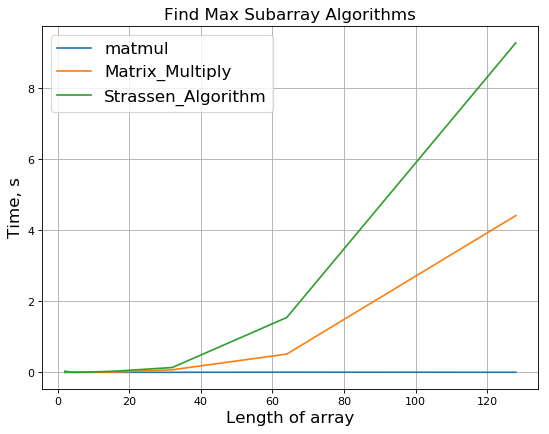

In [8]:
plt.figure(num=None, figsize = (8, 6), dpi = 80)

p1 = plt.plot([2 ** i for i in range(1, N + 1)], t1)
p2 = plt.plot([2 ** i for i in range(1, N + 1)], t2)
p3 = plt.plot([2 ** i for i in range(1, N + 1)], t3)

plt.title('Find Max Subarray Algorithms', fontsize = 15)
plt.xlabel('Length of array', fontsize = 15)
plt.ylabel('Time, s', fontsize = 15)

plt.grid()
plt.legend((p1[0], p2[0], p3[0]),('matmul', 'Matrix_Multiply', 'Strassen_Algorithm'), fontsize = 15)
plt.show()

In [9]:
[2 ** i for i in range(1, N + 1)]

[2, 4, 8, 16, 32, 64, 128]